<a href="https://colab.research.google.com/github/yuvasrivemulapalli/TSFIntern/blob/master/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task #2 - To Explore Supervised Machine Learning**

* In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.
* Data can be found at http://bit.ly/w-data
* What will be predicted score if a student study for 9.25 hrs in a day?

In [ ]:
# Importing all libraries required.  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#Hence, our data has 25 rows and 2 columns
data.info()

In [ ]:
#Shape of the data
data.shape

(25, 2)

In [ ]:
#The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data1 = data.corr()
data1.head()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [ ]:
#Checking for any null values, if any, in the data.
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
data.isnull().values.any()

False

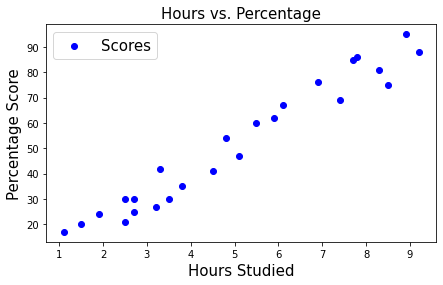

In [ ]:
#Plotting how percentage scores varies with number of hours studied
plt.figure(figsize = (7, 4))
plt.scatter(x = 'Hours', y = 'Scores', data = data, color = 'b') ; 
plt.title('Hours vs. Percentage', fontsize = 15)  
plt.xlabel('Hours Studied', fontsize = 15)  
plt.ylabel('Percentage Score', fontsize = 15)  
plt.legend(fontsize = 15);

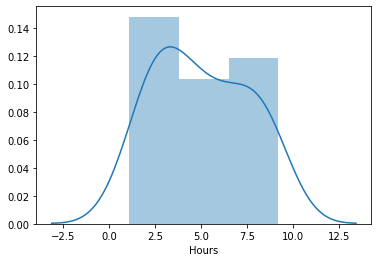

In [ ]:
#Distribution of Hours feature
sns.distplot(data['Hours'])

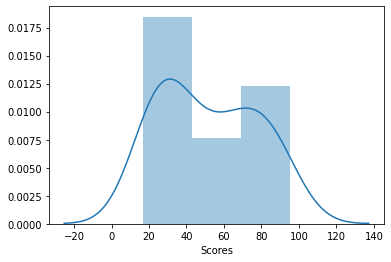

In [ ]:
#Distribution of Score Feature
sns.distplot(data['Scores'])

In [ ]:
#Data preparation
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [ ]:
#Spliting the data into training and test sets
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
#Take a look at x
print(x)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [ ]:
#Take a look at y
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [ ]:
#Training the algorithm
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
int=regressor.intercept_
coef=regressor.coef_
print("model result")
res=pd.DataFrame({'intercept': int, 'coefficient': coef})
res

model result


,intercept,coefficient
0,2.01816,9.910656


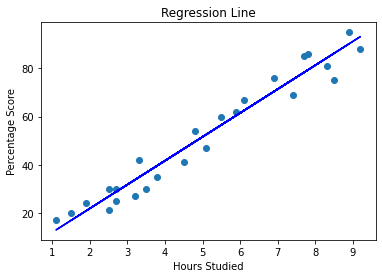

In [ ]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the trained data
plt.scatter(x, y)
plt.plot(x, line,color='b');
plt.title('Regression Line')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()
plt.show()

In [ ]:
#Plotting the best fit regression line
reg_line = (regressor.coef_*x) + regressor.intercept_
reg_line

array([[26.79480124],
       [52.56250809],
       [33.73226078],
       [86.25874013],
       [36.70545772],
       [16.88414476],
       [93.19619966],
       [56.52677068],
       [84.27660883],
       [28.77693254],
       [78.33021494],
       [60.49103328],
       [46.6161142 ],
       [34.72332643],
       [12.91988217],
       [90.22300272],
       [26.79480124],
       [20.84840735],
       [62.47316457],
       [75.357018  ],
       [28.77693254],
       [49.58931115],
       [39.67865467],
       [70.40168976],
       [79.32128059]])

Text(0.5, 1.0, 'Total hours of study vs percentage')

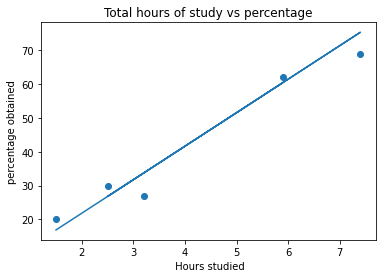

In [ ]:
# Plotting for the tested data
result=coef*x_test+int
plt.scatter(x_test,y_test)
plt.plot(x_test,result)
plt.xlabel(' Hours studied')
plt.ylabel('percentage obtained')
plt.title('Total hours of study vs percentage')

In [ ]:
# Testing data - In Hours
print(x_test) 
# Predicting the scores
y_pred = regressor.predict(x_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


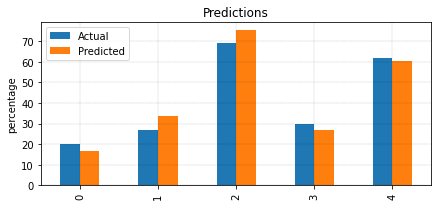

In [ ]:
df.plot(kind='bar', figsize=(7,3))
plt.grid(which='major', linestyle=':', linewidth='0.2', color='black')
plt.ylabel('percentage')
plt.title('Predictions')
plt.show()

In [ ]:
#What will be predicted score if a student study for 9.25 hrs in a day?
no_of_hours = 9.25
prediction = regressor.predict([[no_of_hours]])
print('Number of hours:', no_of_hours) 
print('Predicted score:', prediction[0])

Number of hours: 9.25
Predicted score: 93.69173248737539


In [ ]:
#Performance evaluation
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456


## **Hence, if a student studies for 9.25 hours a day, he will score 93%**